In [1]:
import sys
import rootpath
sys.path.append(rootpath.detect())
import os
import time

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
from testsuite.utilities import dominates, dominated

In [4]:
from testsuite.results import Result

In [99]:
def montecarlo_case(case, samples, P, va_r=None, vb_r=None):
    samples = int(samples)
    resolution = int(np.sqrt(samples)/5)
    
    xy = np.vstack([np.random.uniform(0, i, samples) for i in case['ref_point']]).T
    t_ideal = case['target'].min(axis=0)
    t_az = case['target'].max(axis=0)
    
    if va_r is None or vb_r is None:
        va_r = xy[[dominates(case['target'], xy)]]
        vb_r = xy[[np.any([dominates(pi, xyi) for pi in P]) and np.any([dominates(xyi, t) for t in case['target']]) for xyi in xy]]
        
#     if va_r is None or vb_r is None:
#         va_r = xy[[dominates(case['target'], xy) and dominates(xyi, case['ref_point']) for xyi in xy]]
#         vb_r = xy[[np.any([dominates(pi, xyi) for pi in P]) and np.any([dominates(xyi, t) for t in case['target']]) for xyi in xy]]
        
    va = va_r[[dominates(case['target'], xyi) and dominates(case['p'], xyi)  for xyi in va_r]]
    vb = vb_r[[np.any([dominates(xyi, t) for t in case['target']]) and dominates(case['p'], xyi) for xyi in vb_r]]
    
    va_frac = np.round(len(va)/len(va_r), 3)
    vb_frac = np.round(len(vb)/len(vb_r), 3)
    
    return va, vb, va_r, vb_r

In [6]:
# load an instance
path = os.path.join(rootpath.detect(), "experiments/directed/data_undirected_comp/wfg5_4obj_10dim/log_data/OF_objective_function__opt_Saf__ninit_10__surrogate_MultiSurrogateGP__ei_False",
                   "OF_objective_function__opt_Saf__ninit_10__surrogate_MultiSurrogateGP__ei_False__seed_30__uuid_7c4534bc-0456-11ec-8d33-f1bd6cdeb6ef_results.pkl")
os.path.isfile(path)

True

In [7]:
result = Result(path)

In [8]:
ref_path = os.path.join(rootpath.detect(), "experiments/directed/template/targets/reference_points")
os.path.isfile(ref_path)
with open(ref_path, "r") as infile: 
    ref_D = json.load(infile)

In [9]:
ref_p = np.asarray(ref_D['wfg5_4obj_10dim'])
ref_p[::10].shape

(800, 4)

In [10]:
t_path = os.path.join(rootpath.detect(), "experiments/directed/template/targets/targets")
os.path.isfile(t_path)
with open(t_path, "r") as infile: 
    t_D = json.load(infile)

In [101]:
reference_p.shape

(8000, 4)

In [15]:
case = {'ref_point': rp,
        'name': 'worst case',
        'target' : t,
        'p' : result.p[::5]}

In [100]:
tic = time.time()
reference_p = ref_p
va, vb, v_ar, v_br = montecarlo_case(case, 1e3, reference_p)
toc = time.time()
print(toc-tic)

<ipython-input-99-0a03285ee345>:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  va_r = xy[[dominates(case['target'], xy)]]


116.58936405181885


In [105]:
((1e6/1e3)*117)/60/60

32.5

In [103]:
tic = time.time()
reference_p = ref_p
va, vb, var, vbr= montecarlo_case(case, 1e4, reference_p, va_r=v_ar, vb_r=v_br)
toc = time.time()
print(toc-tic)

0.05546760559082031


In [79]:
va = va_r[[dominates(case['target'], xyi) and dominates(xyi, case['ref_point']) and dominates(case['p'], xyi)  for xyi in va_r]]
va = va_r[np.logical_and(np.logical_and(dominates(case['target'], va_r), dominated(va_r, case['ref_point'])), dominates(case['p'], va_r))]

(2, 4)

In [ ]:
va = va_r[[dominates(case['target'], xyi) and dominates(case['p'], xyi)  for xyi in va_r]]


In [97]:
%%timeit
ai = [dominates(case['target'], xyi) and dominates(case['p'], xyi) for xyi in v_ar]
# aii = [dominates(case['p'], xyi) for xyi in v_ar]
# print(sum(ai))
# print(sum(aii))

10.1 ms ± 665 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [98]:
%%timeit
bi = np.logical_and(dominates(case['target'], v_ar), dominates(case['p'], v_ar))
# bii = dominates(case['p'], v_ar)

# print(sum(bi))
# print(sum(bii))

17.8 ms ± 886 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


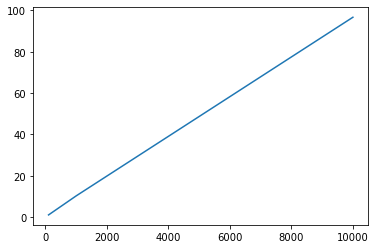

In [37]:
plt.plot([int(r) for r in R.keys()], [r for r in R.values()])

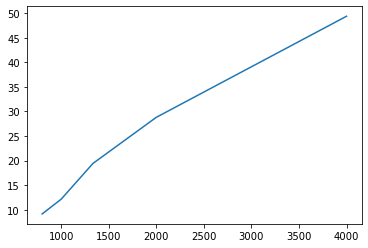

In [32]:
plt.plot([int(r) for r in R.keys()], [r for r in R.values()])

In [38]:
ref_p.shape

(8000, 4)